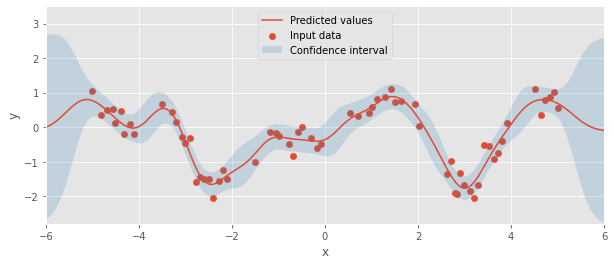

In [407]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige import OrdinaryKriging

plt.style.use("ggplot")

# fmt: off
# Data taken from
# https://blog.dominodatalab.com/fitting-gaussian-process-models-python/
X, y = np.array([
     [-5.01, 1.06],  [-4.82, 0.35], [-4.69, 0.49], [-4.56, 0.52],
     [-4.52, 0.12], [-4.39, 0.47], [-4.32,-0.19], [-4.19, 0.08], [-4.11,-0.19],

     [-3.50, 0.66], [-3.28, 0.45], [-3.20, 0.14], [-3.07,-0.28],
     [-3.01,-0.46], [-2.90,-0.32], [-2.77,-1.58], [-2.69,-1.44], [-2.60,-1.51],
     [-2.49,-1.50], [-2.41,-2.04], [-2.28,-1.57], [-2.19,-1.25], [-2.10,-1.50],
 
     [-1.50,-1.00],  [-1.19,-0.15], [-1.06,-0.18],
     [-0.98,-0.25], [-0.78,-0.49], [-0.68,-0.83], [-0.57,-0.15],
     [-0.50, 0.00],  [-0.29,-0.32], [-0.18,-0.60], [-0.09,-0.49],

     [0.53 , 0.40],  [0.70 , 0.32], [0.94 , 0.42], [1.02 , 0.57],
     [1.13 , 0.82],  [1.30 , 0.86], [1.43 , 1.11], [1.50 , 0.74],
     [1.63 , 0.75],   [1.93 , 0.68], [2.03 , 0.03],

     [2.63 ,-1.37], [2.72 ,-0.99], [2.80 ,-1.92], [2.83 ,-1.94], [2.91 ,-1.32],
     [3.00 ,-1.69], [3.13 ,-1.84], [3.21 ,-2.05], [3.30 ,-1.69], [3.41 ,-0.53],
     [3.52 ,-0.55], [3.63 ,-0.92], [3.72 ,-0.76], [3.80 ,-0.41], [3.91 , 0.12],

     [4.52 , 1.11], [4.65 , 0.36], [4.74 , 0.79], [4.84 , 0.87], [4.93 , 1.01],
     [5.02 , 0.55]
]).T
# fmt: on

X_pred = np.linspace(-6, 6, 200)

# pykrige doesn't support 1D data for now, only 2D or 3D
# adapting the 1D input to 2D
uk = OrdinaryKriging(X, np.zeros(X.shape), y, variogram_model="gaussian")

y_pred, y_std = uk.execute("grid", X_pred, np.array([0.0]))

y_pred = np.squeeze(y_pred)
y_std = np.squeeze(y_std)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.scatter(X, y, s=40, label="Input data")


ax.plot(X_pred, y_pred, label="Predicted values")
ax.fill_between(
    X_pred,
    y_pred - 3 * y_std,
    y_pred + 3 * y_std,
    alpha=0.2,
    label="Confidence interval",
)
ax.legend(loc=9)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-6, 6)
ax.set_ylim(-2.8, 3.5)
plt.show()

In [ ]:
import itertools
all_combinations = [list(zip(each_permutation, list2)) for each_permutation in itertools.permutations(list1, len(list2))]

Example with the NTI

In [295]:
from pykrige.uk import UniversalKriging
import importlib
import positioning_sensors as ps

importlib.reload(ps)

<module 'positioning_sensors' from '/Users/rodrigo/SourceCodes/git/optimal_light_sensor_location/positioning_sensors.py'>

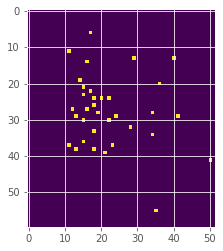

In [296]:
#Original nocturnal image without values <21
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)
nonsat = ps.desaturate(luminance,th=62)

nonsat = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')


W1 = ps.f5(nonsat,importance)
W2 = ps.f2(nonsat,importance)
seeds = ps.getMax(W1)
seedsc = ps.getMax(W1)

#seedsc[19][17]=0
#seedsc[29][13]=0
#seedsc[33][18]=0
#seedsc[33][20]=0
#seedsc[34][35]=0
#seedsc[34][36]=0
#seedsc[34][33]=0
#seedsc[35][34]=0

seeds = seedsc

seeds_nonsat = ps.getMax(nonsat)
coords = ps.get_coords(seeds)
coords_nonsat = ps.get_coords(seeds)

plt.imshow(seeds*np.max(W1)/2+W1)
plt.imshow(seeds)

In [585]:
ix = 0

zv = nonsat[coords_nonsat[ix][0]][coords_nonsat[ix][1]]

z = np.array([zv])


for ix in range(1,len(coords_nonsat)):
    zv = nonsat[coords_nonsat[ix][0]][coords_nonsat[ix][1]]
    z = np.append(z,zv)

In [586]:
data = np.column_stack((coords_nonsat,z))

In [587]:
#filas
gridy = np.arange(0.0, nonsat.shape[0], 1)

#columnas
gridx = np.arange(0.0, nonsat.shape[1], 1)

In [655]:
UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],

)

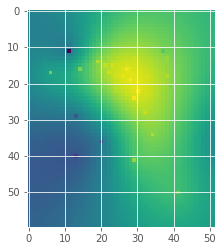

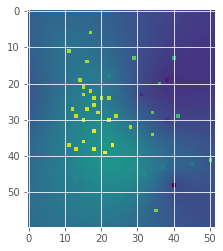

In [659]:
z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

new_z = np.flip(z)
plt.imshow(new_z+seeds*50)

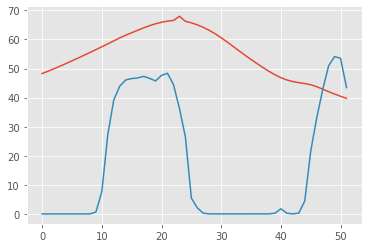

In [657]:
plt.plot(new_z[40][:])
plt.plot(nonsat[40][:])

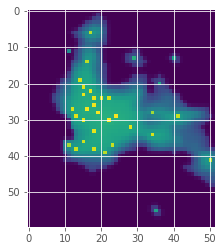

In [662]:
plt.imshow(seeds*40+nonsat)

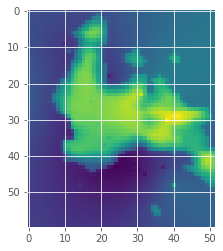

In [658]:
plt.imshow((nonsat-new_z))

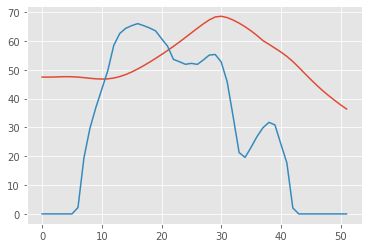

In [624]:
plt.plot(z[23][:])
plt.plot(nonsat[23][:])

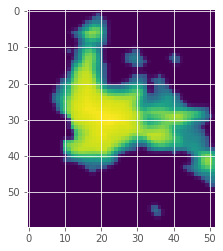

In [303]:
plt.imshow(nonsat)

In [304]:
ss[30][22]

0.04430890621863881

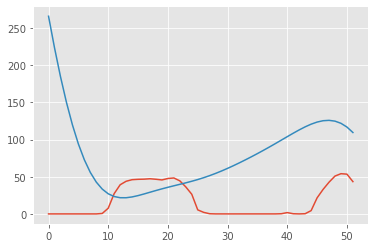

In [305]:
plt.plot(nonsat[40][:])
plt.plot(z[40][:])

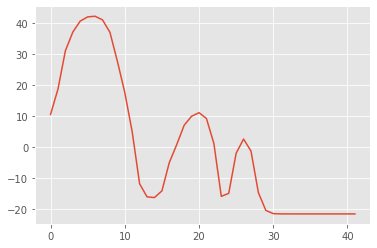

In [480]:
y = nonsat_smooth[20][10:]


y = y-np.mean(y)
plt.plot(y)

In [487]:
range(0,40,2)

range(0, 40, 2)

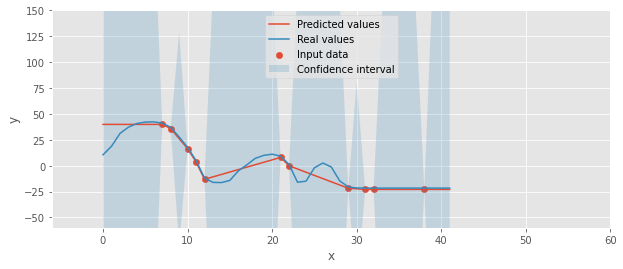

58.29645004900621


In [580]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige import OrdinaryKriging

import scipy as sp
import scipy.ndimage

X = np.array([np.random.randint(0,len(y)) for i in range(int(len(y)*0.4))])
X = np.array([np.random.randint(0,len(y)) for i in range(11)])
#X = np.arange(0,40,4)
Y = np.array(y[X])-np.mean(np.array(y[X]))

plt.style.use("ggplot")

# fmt: off
# Data taken from
# https://blog.dominodatalab.com/fitting-gaussian-process-models-python/


X_pred = np.arange(len(y))
# pykrige doesn't support 1D data for now, only 2D or 3D
# adapting the 1D input to 2D
uk = OrdinaryKriging(X, np.zeros(X.shape), Y)
y_pred, y_std = uk.execute("grid", X_pred, np.array([0.0]))
y_pred = np.squeeze(y_pred)
y_std = np.squeeze(y_std)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.scatter(X, Y, s=40, label="Input data")
ax.plot(X_pred, y_pred, label="Predicted values")
ax.plot(X_pred, y, label="Real values")
ax.fill_between(
    X_pred,
    y_pred - 3 * y_std,
    y_pred + 3 * y_std,
    alpha=0.2,
    label="Confidence interval",
)
ax.legend(loc=9)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-6, 60)
ax.set_ylim(-60, 150)

plt.show()

print(np.mean((y_pred-y)**2))

In [519]:
71.99812269084234

58.477881022991454

Regression Krigging

In [309]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige import OrdinaryKriging

X = np.array([np.random.randint(0,len(y)) for i in range(int(len(y)*0.6))])
p = np.array(y[X])

plt.style.use("ggplot")

















In [310]:
xn = np.column_stack((X,np.zeros(len(X)))) 
y = X[1]

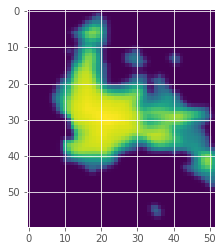

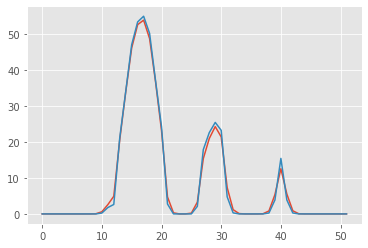

In [311]:
#Smoothing bidimensional array



sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

nonsat_smooth = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
seeds_nonsat_smooth = ps.getMax(nonsat_smooth)


plt.imshow(nonsat_smooth)
plt.show()

plt.plot(nonsat_smooth[12,:])
plt.plot(nonsat[12,:])
plt.show()

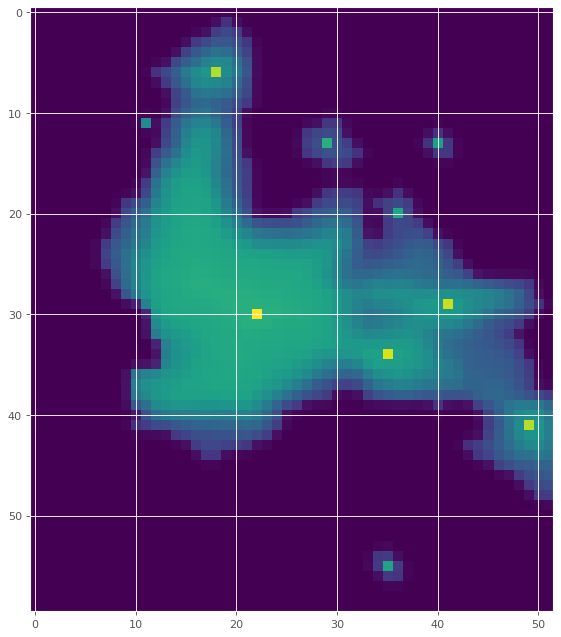

In [393]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(seeds_nonsat_smooth*40+nonsat)
plt.show()

In [397]:
wsr = ps.waterShedRegions(nonsat,ps.get_coords(seeds_nonsat_smooth))


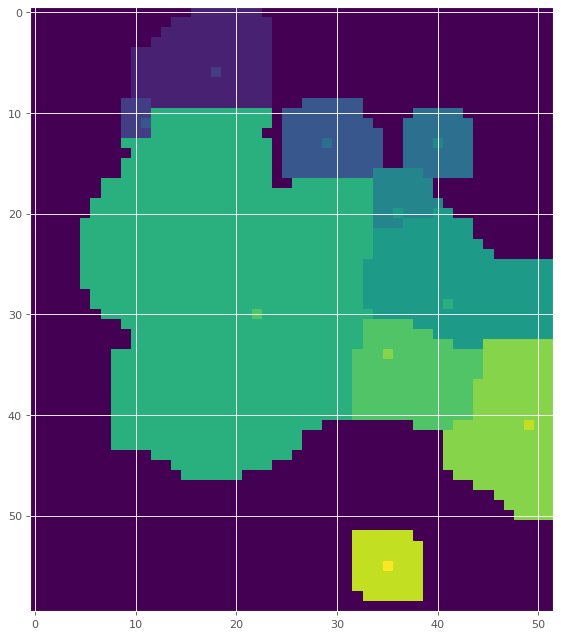

In [403]:
w_all = np.zeros(wsr[0].shape)
for i,w in enumerate(wsr): 
    w_all += w*(i+1)

figure(figsize=(10, 10), dpi=80)
plt.imshow(w_all+seeds_nonsat_smooth)
plt.show()

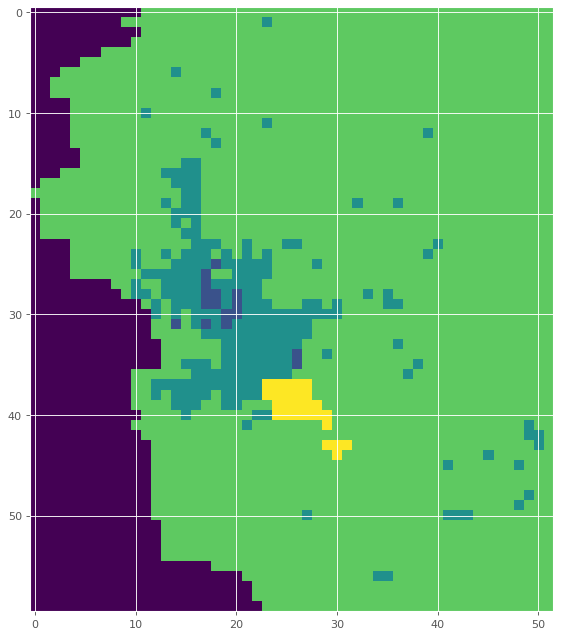

In [370]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(importance)
plt.show()

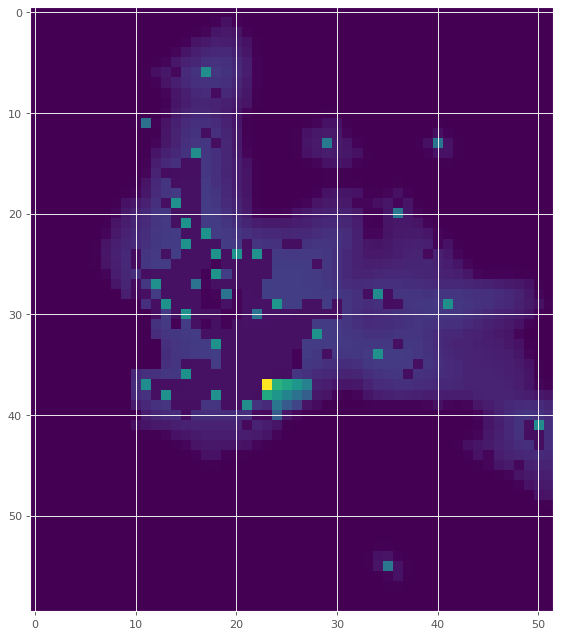

In [313]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
plt.imshow(seeds*np.max(W1)/2+W1)

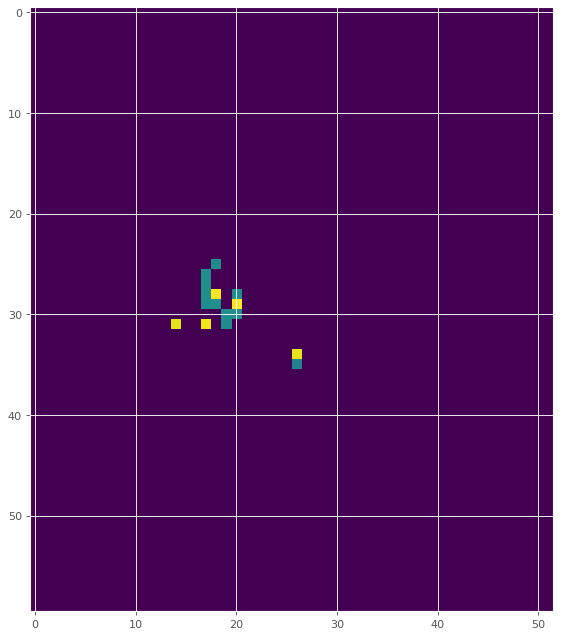

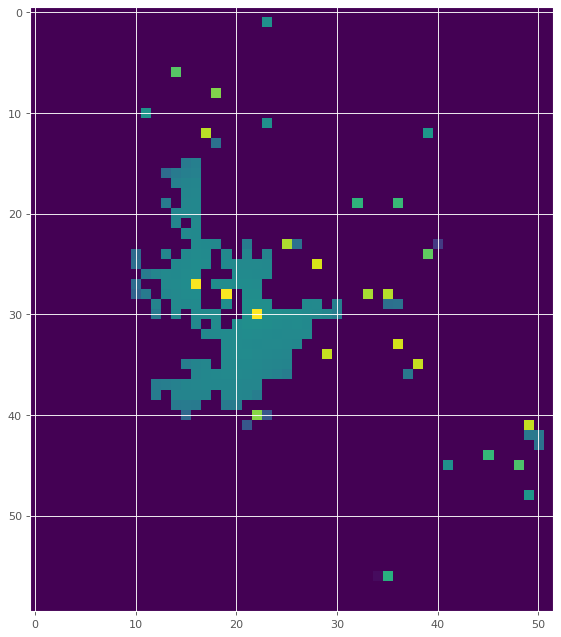

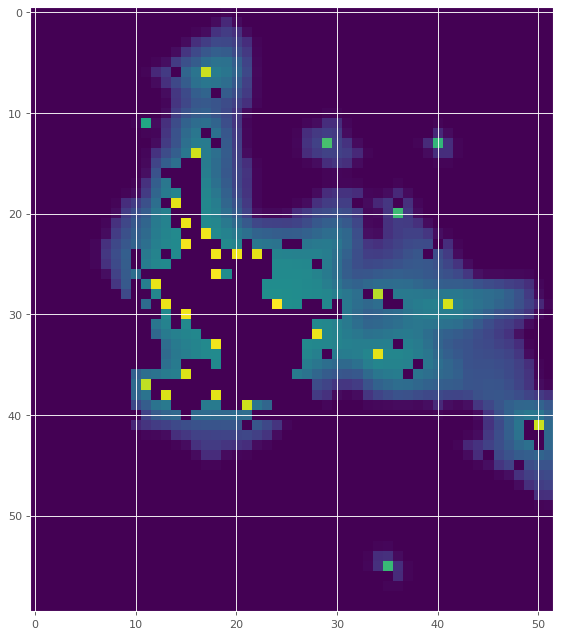

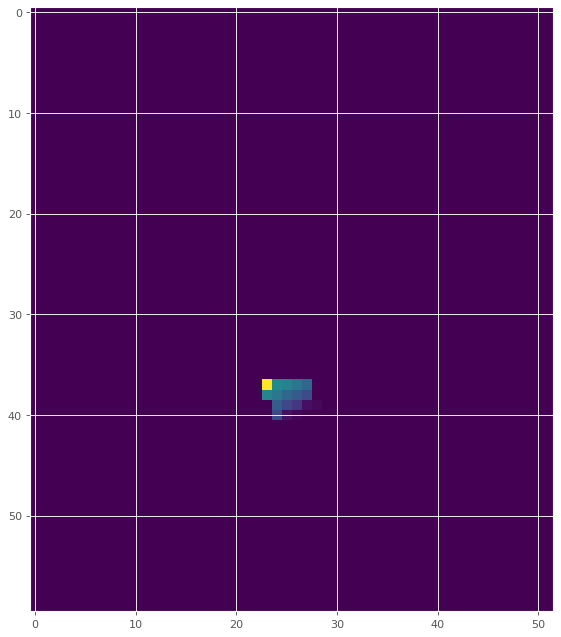

In [337]:
from matplotlib.pyplot import figure

max_each_level = np.zeros(importance.shape)

for l in range(1, int(np.max(importance)+1)):
    figure(figsize=(10, 10), dpi=80)
    level1 = 1*(importance==l)*W1
    locations = ps.getMax(level1)
    max_each_level += locations
    plt.imshow(locations*np.max(level1)+level1)
    plt.show()


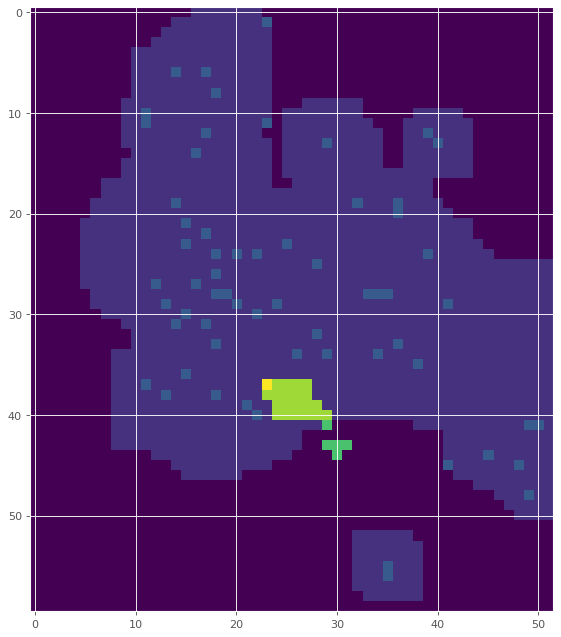

In [376]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(max_each_level+1*(nonsat>0)+5.*(importance==4))

In [315]:
coords = ps.get_coords(max_each_level)

print(len(coords))
print(np.sum(max_each_level.flatten()))


63
63.0


In [373]:
nonsat[43][30]

0.0

In [377]:
variogram, varmask ,locations = ps.computeRegions(nonsat,coords,th = 3 ,atol=15,direction_delta = 2,verbose = True)

Coords  [ 1 23]
--
Coords  [ 6 14]
--
Coords  [ 6 17]
--
Coords  [ 8 18]
--
Coords  [10 11]
--
Coords  [11 11]
--
Coords  [11 23]
--
Coords  [12 17]
--
Coords  [12 39]
--
Coords  [13 29]
--
Coords  [13 40]
--
Coords  [14 16]
--
Coords  [19 14]
--
Coords  [19 32]
--
Coords  [19 36]
--
Coords  [20 36]
--
Coords  [21 15]
--
Coords  [22 17]
--
Coords  [23 15]
--
Coords  [23 25]
--
Coords  [24 18]
--
Coords  [24 20]
--
Coords  [24 22]
--
Coords  [24 39]
--
Coords  [25 28]
--
Coords  [26 18]
--
Coords  [27 12]
--
Coords  [27 16]
--
Coords  [28 18]
--
Coords  [28 19]
--
Coords  [28 33]
--
Coords  [28 34]
--
Coords  [28 35]
--
Coords  [29 13]
--
Coords  [29 20]
--
Coords  [29 24]
--
Coords  [29 41]
--
Coords  [30 15]
--
Coords  [30 22]
--
Coords  [31 14]
--
Coords  [31 17]
--
Coords  [32 28]
--
Coords  [33 18]
--
Coords  [33 36]
--
Coords  [34 26]
--
Coords  [34 29]
--
Coords  [34 34]
--
Coords  [35 38]
--
Coords  [36 15]
--
Coords  [37 11]
--
Coords  [37 23]
--
Coords  [38 13]
--
Coords  [38 

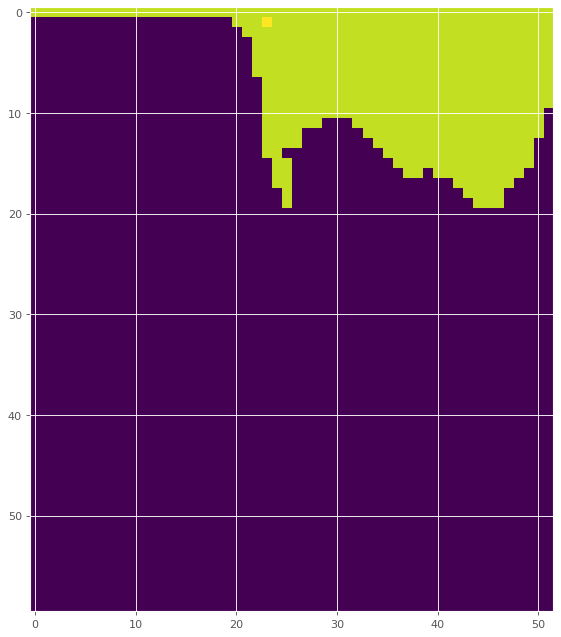

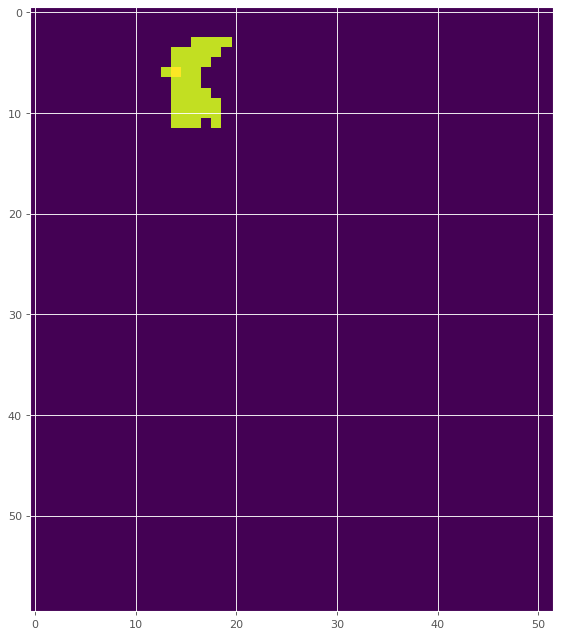

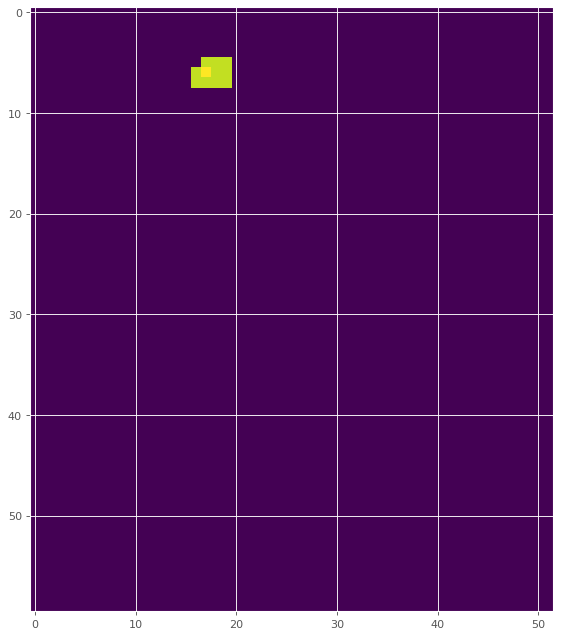

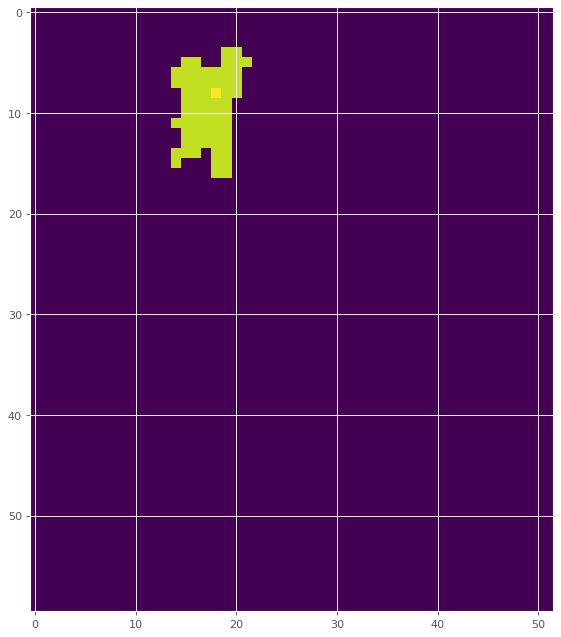

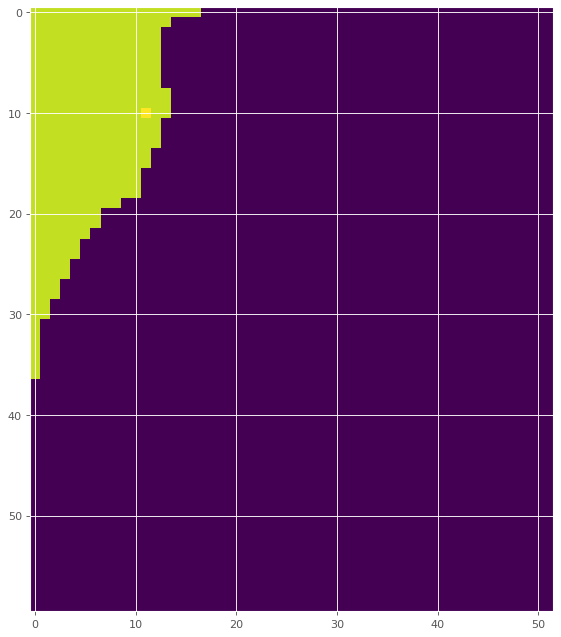

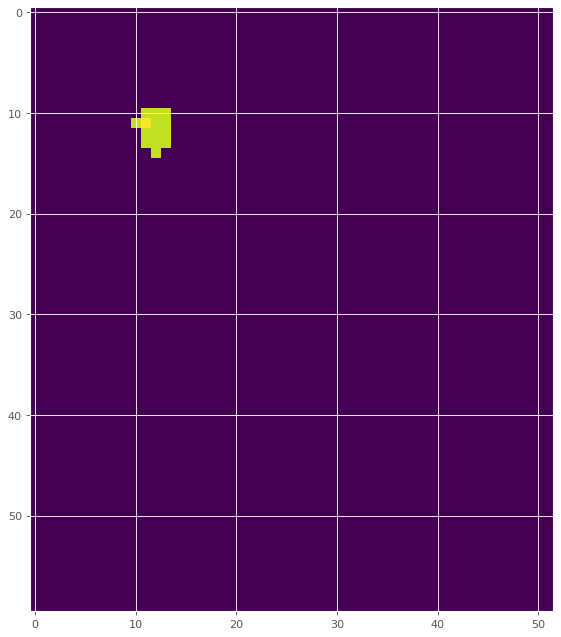

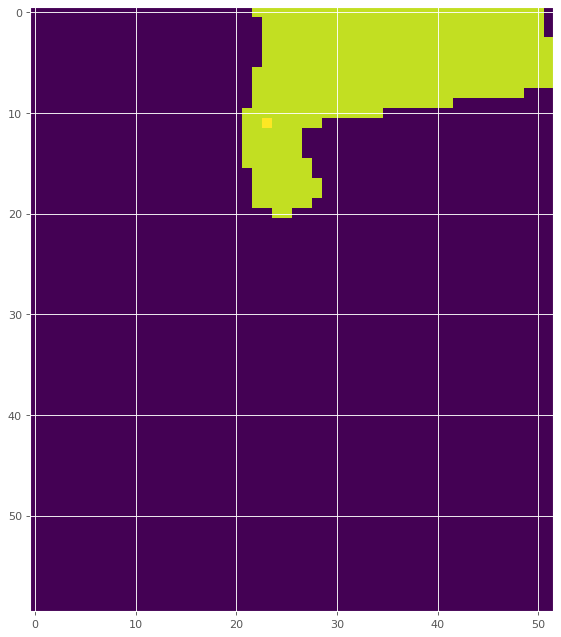

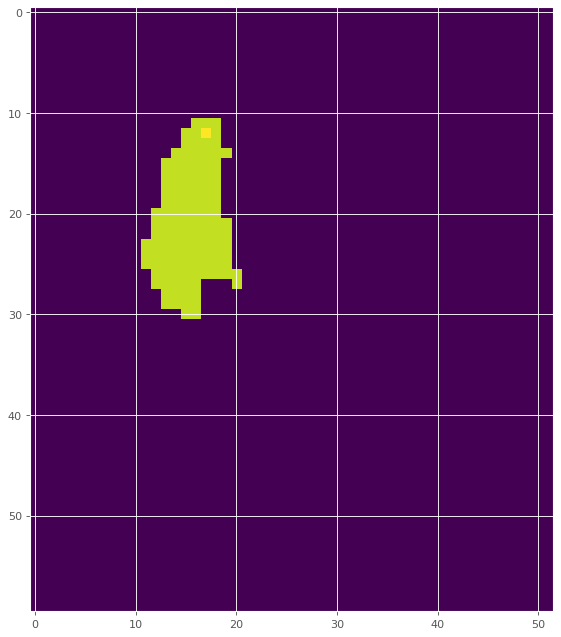

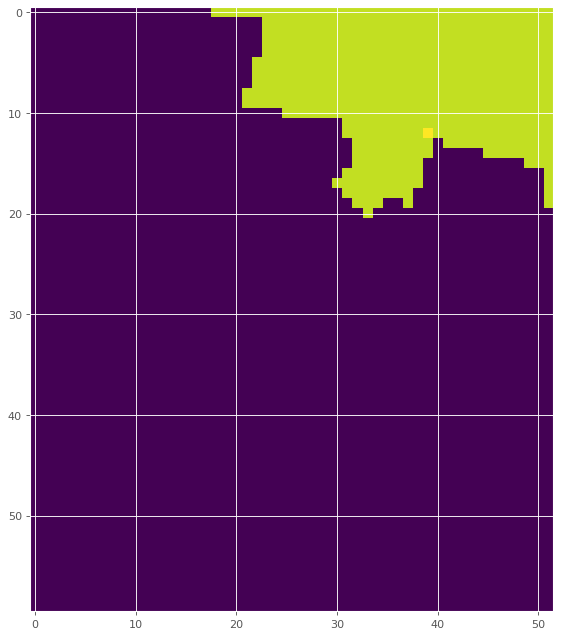

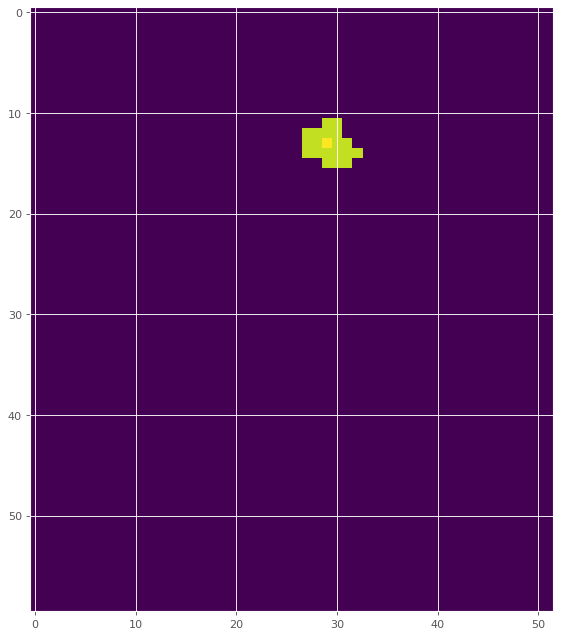

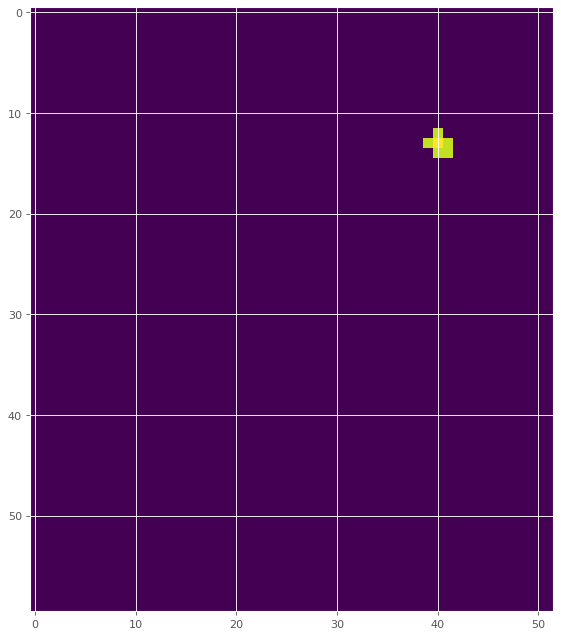

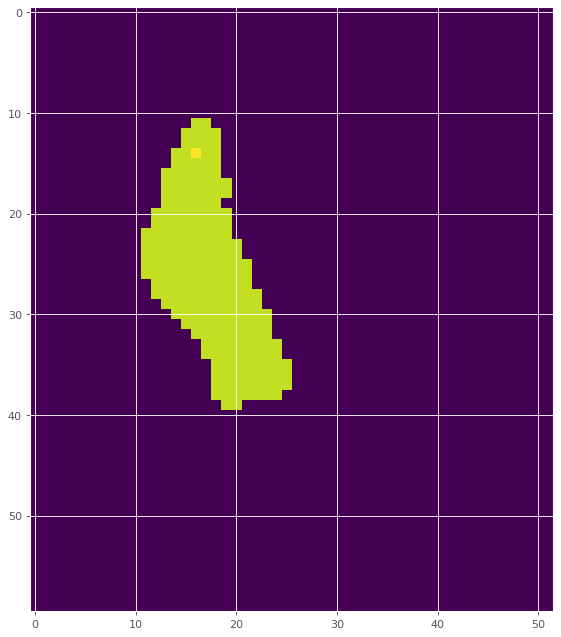

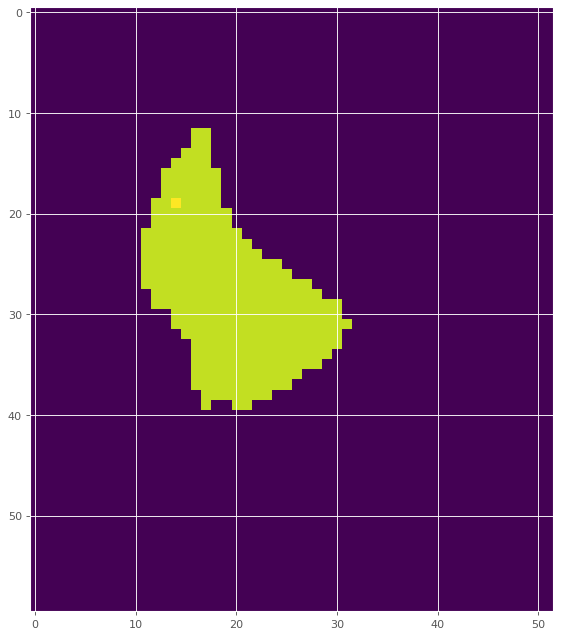

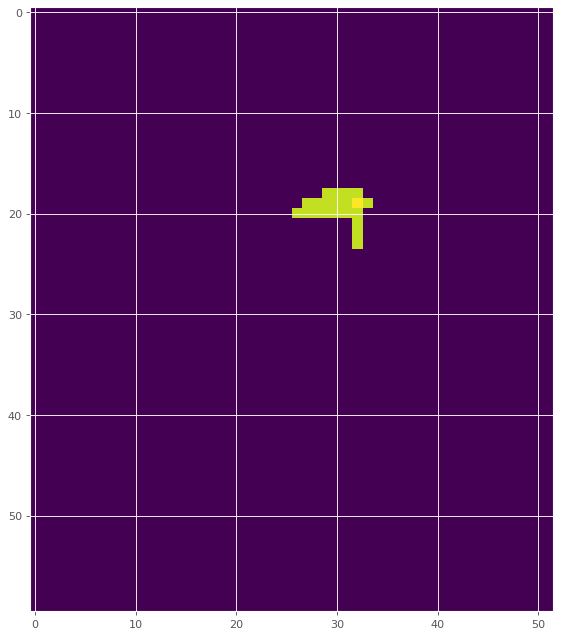

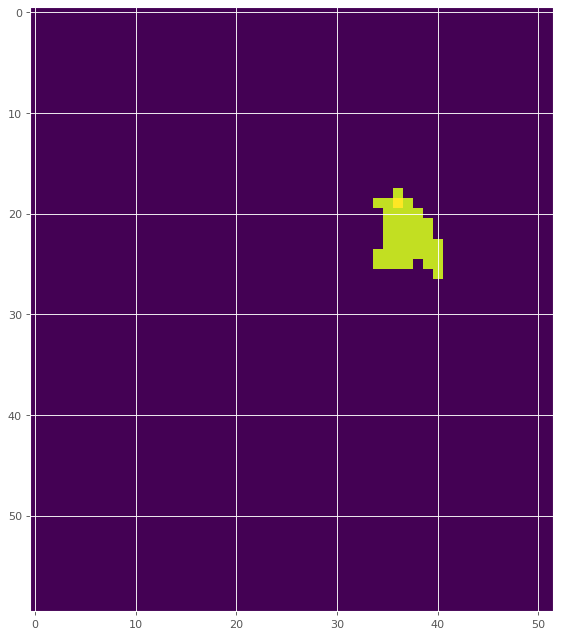

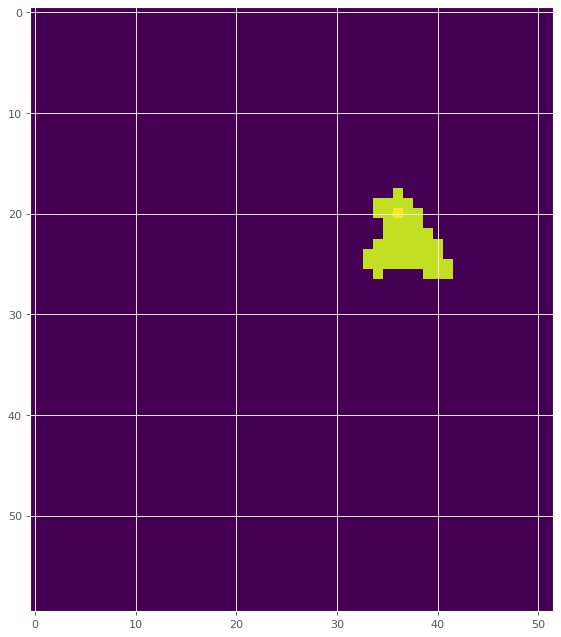

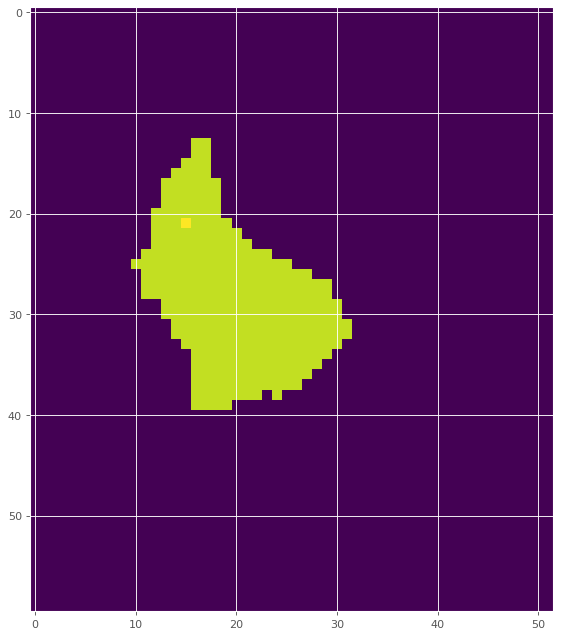

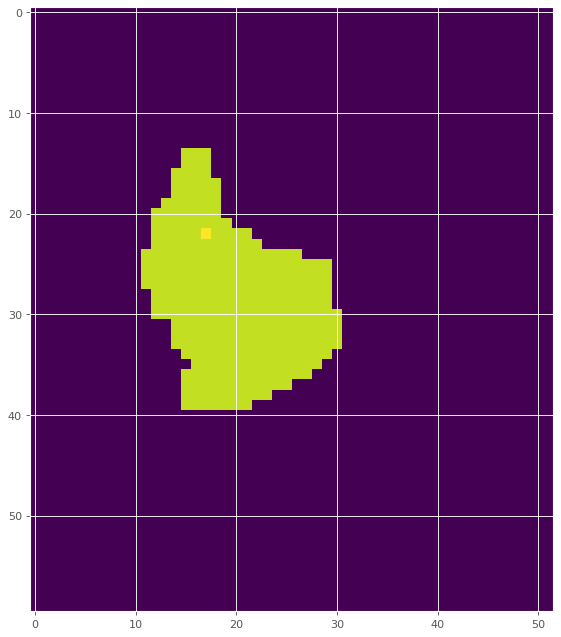

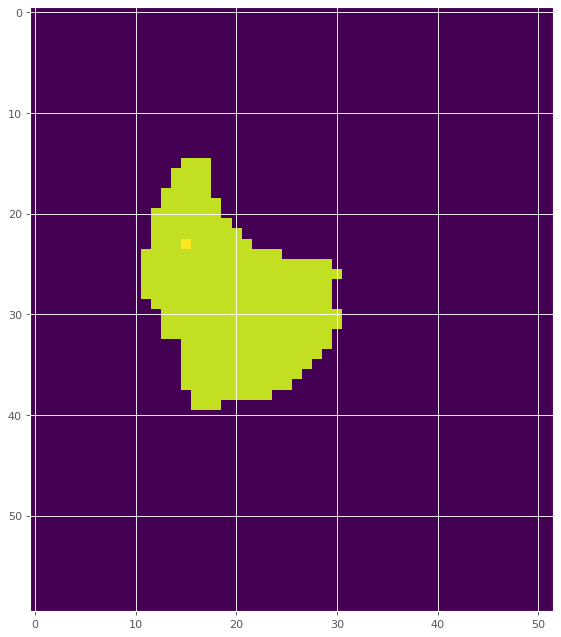

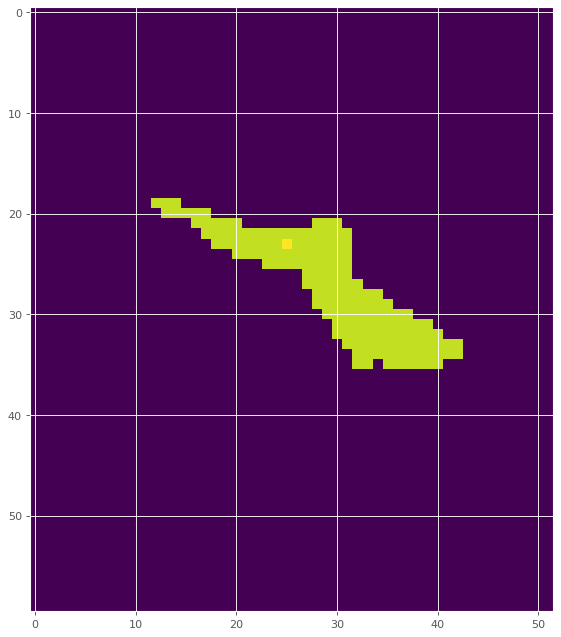

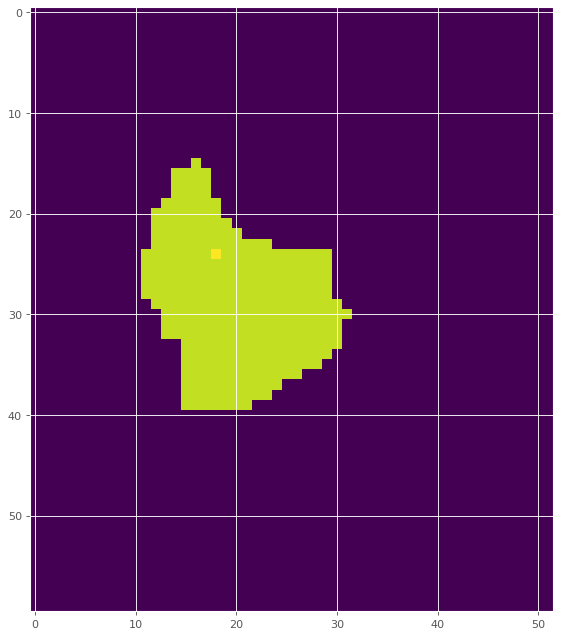

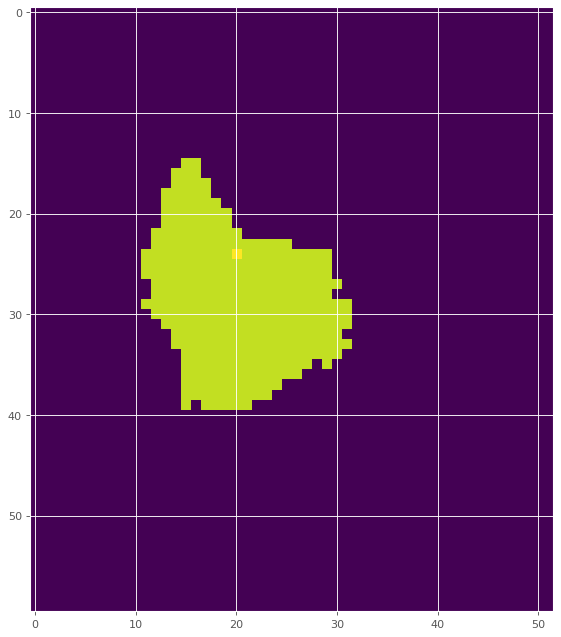

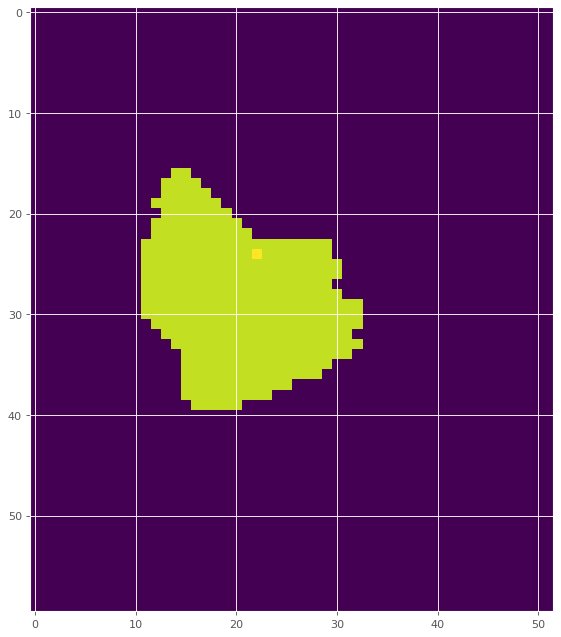

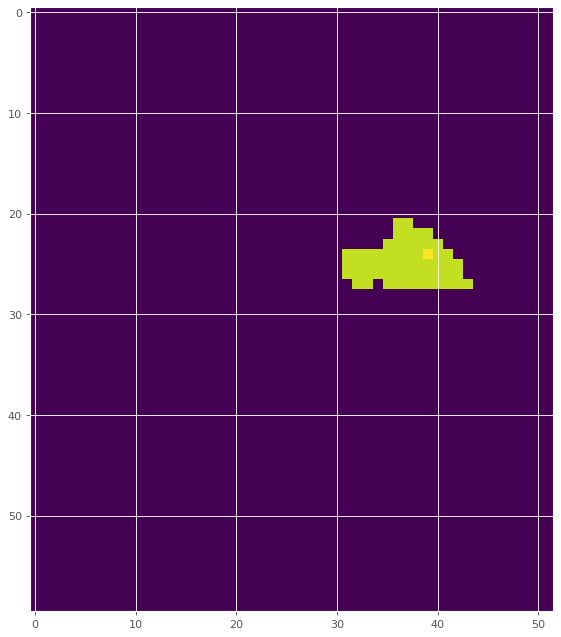

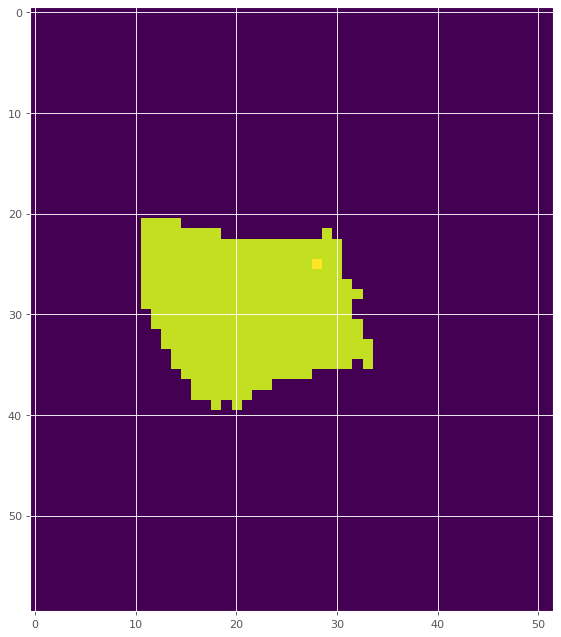

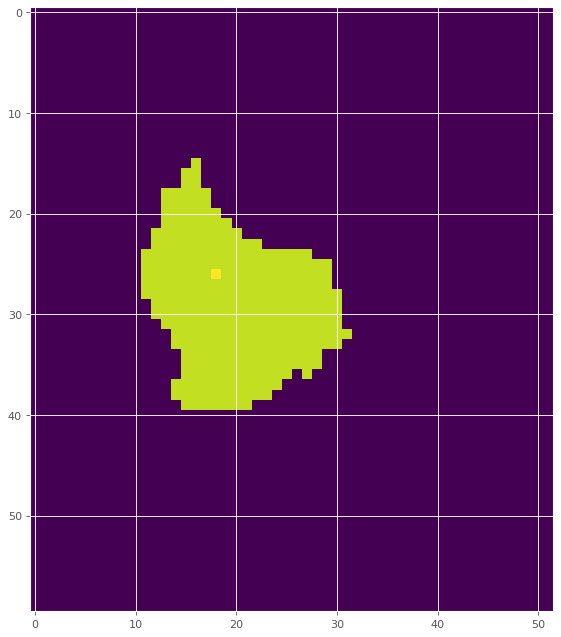

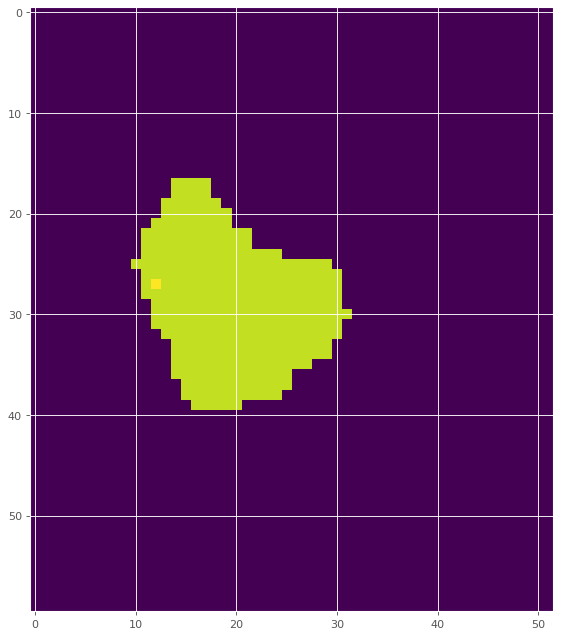

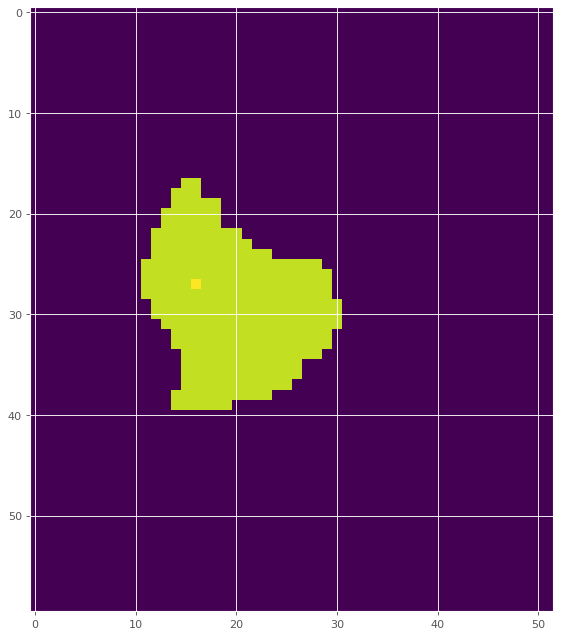

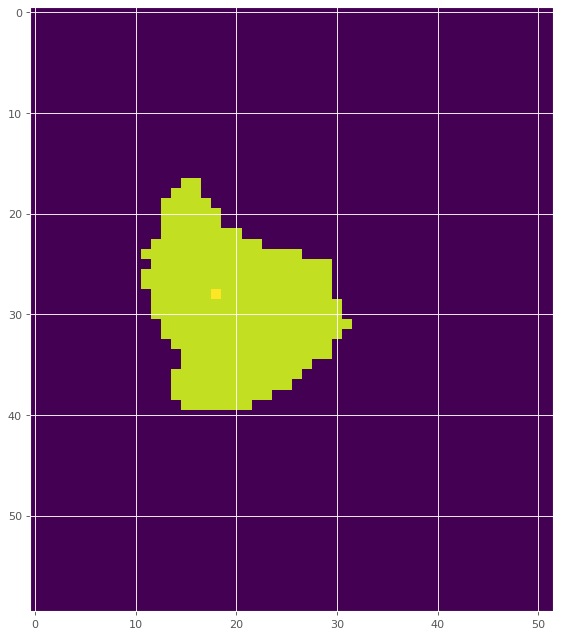

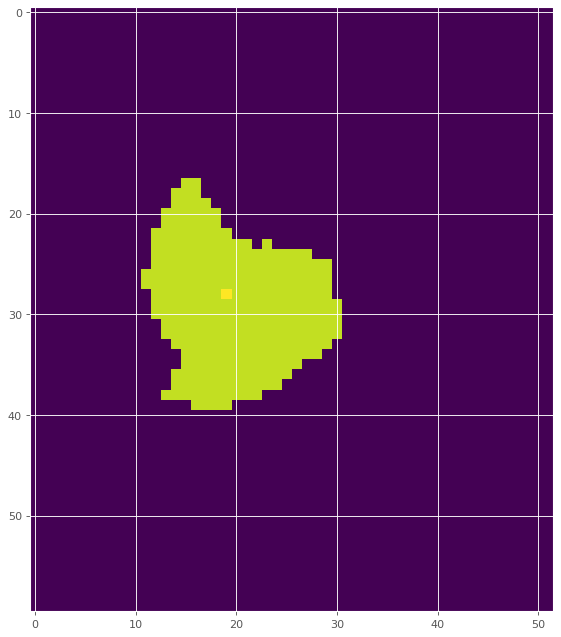

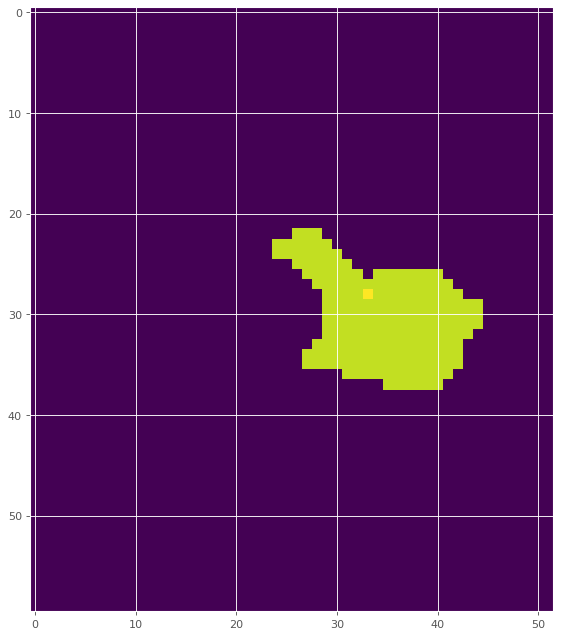

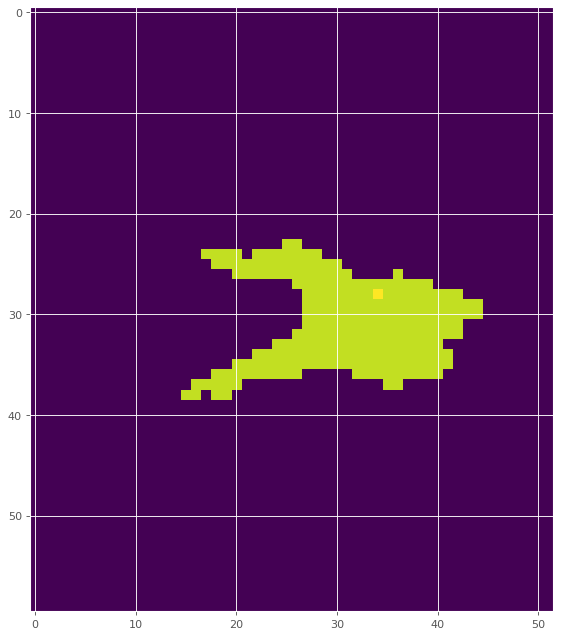

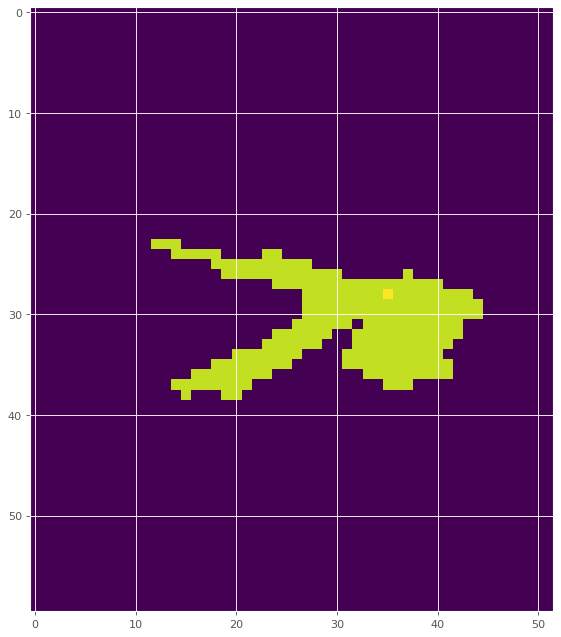

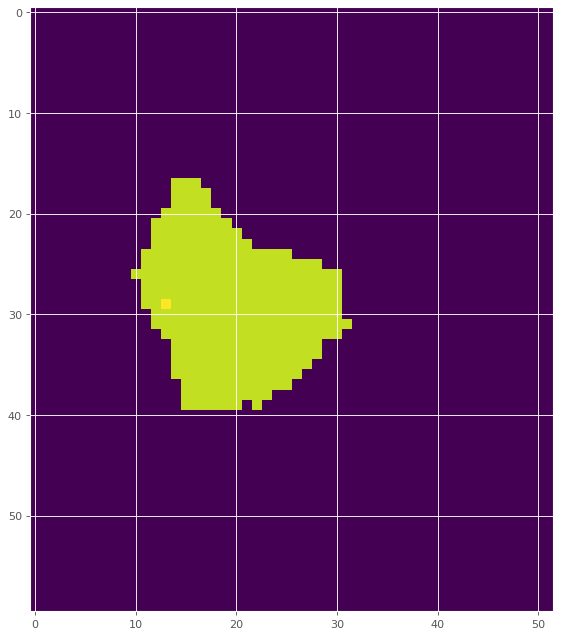

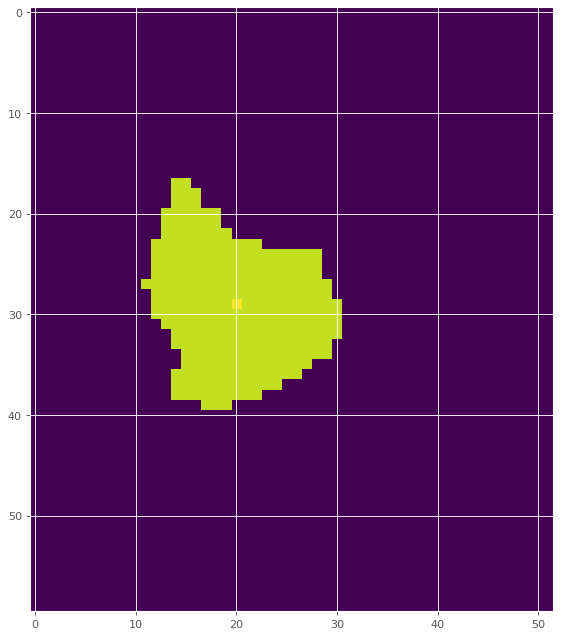

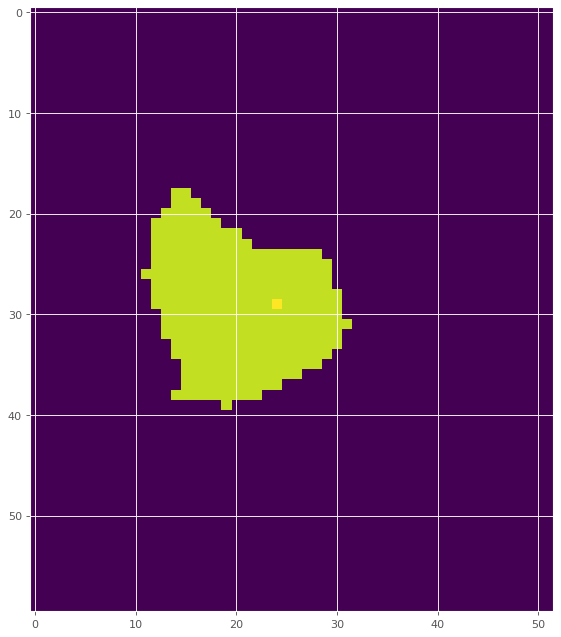

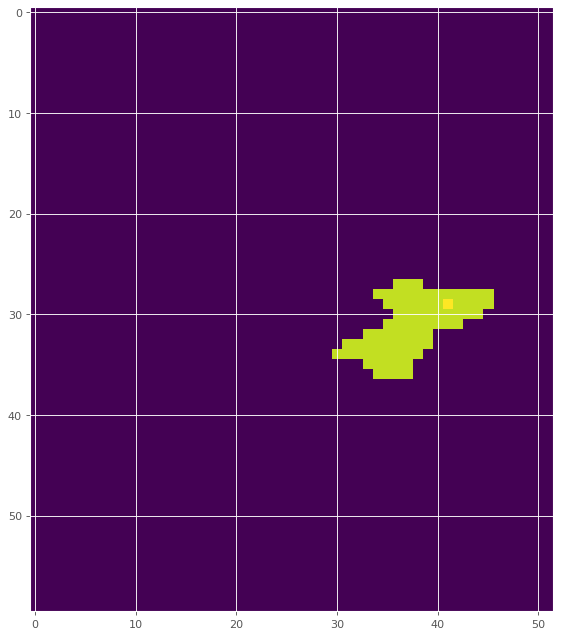

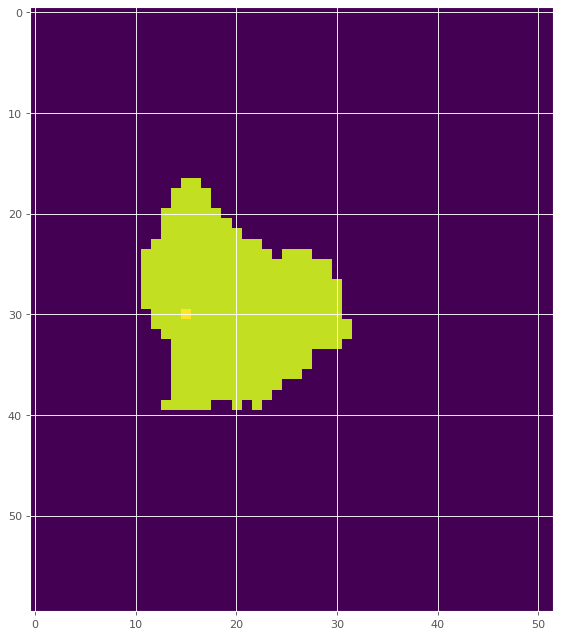

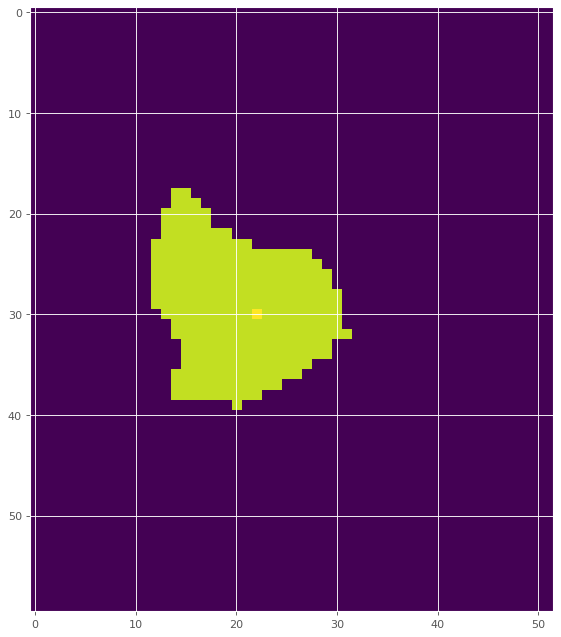

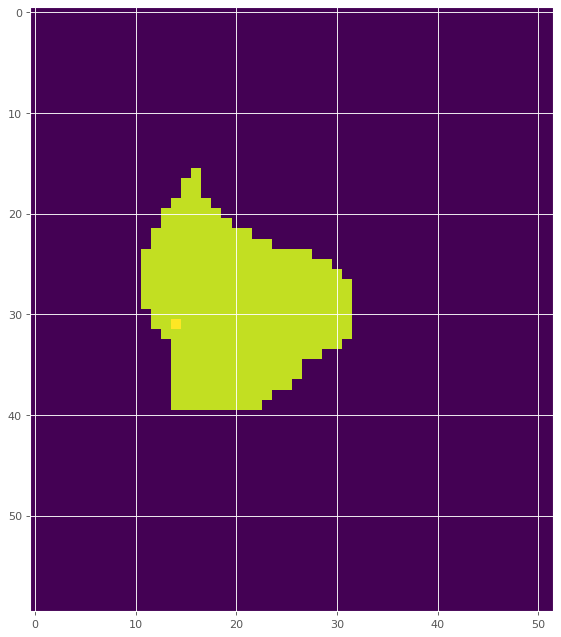

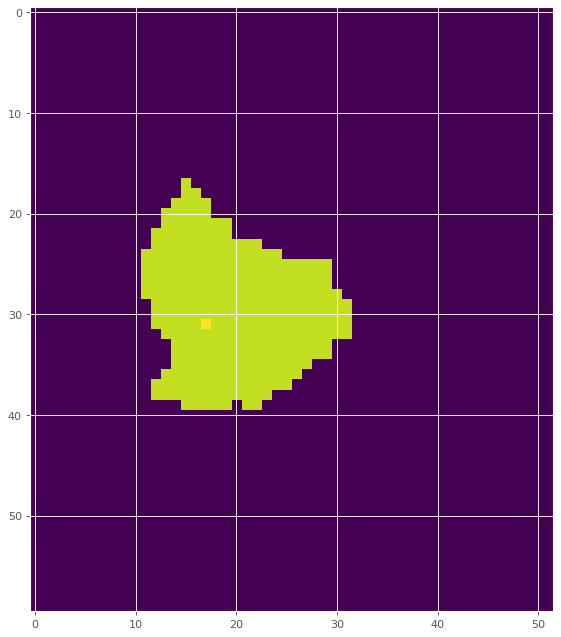

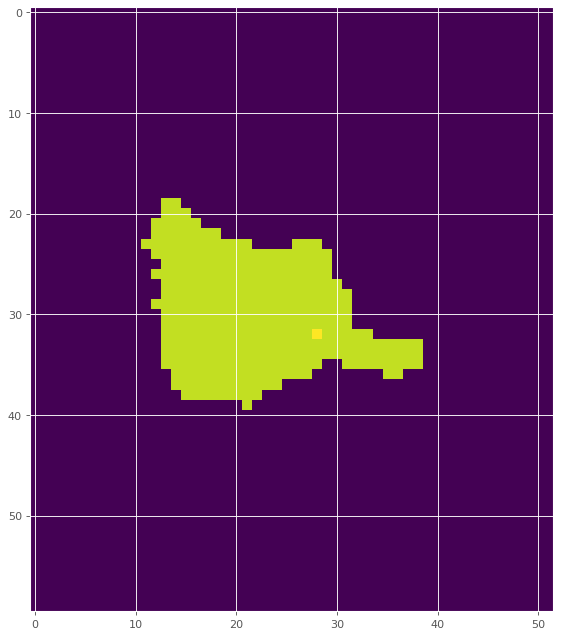

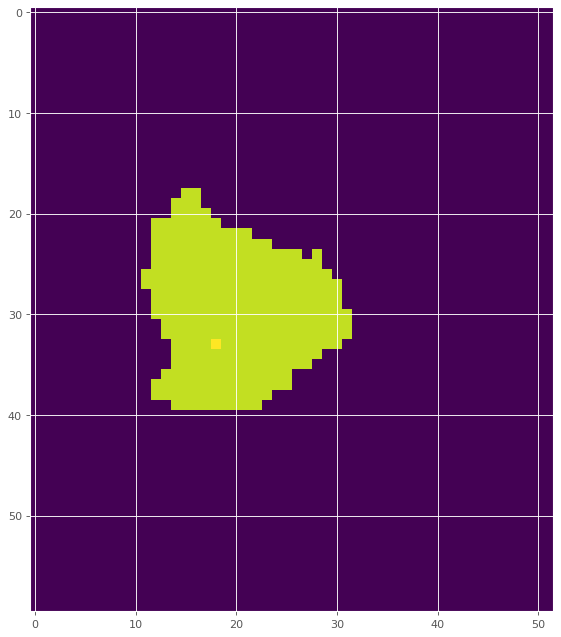

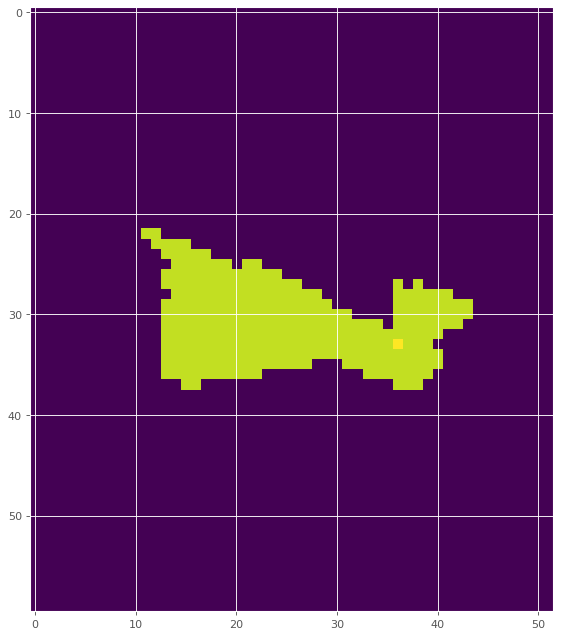

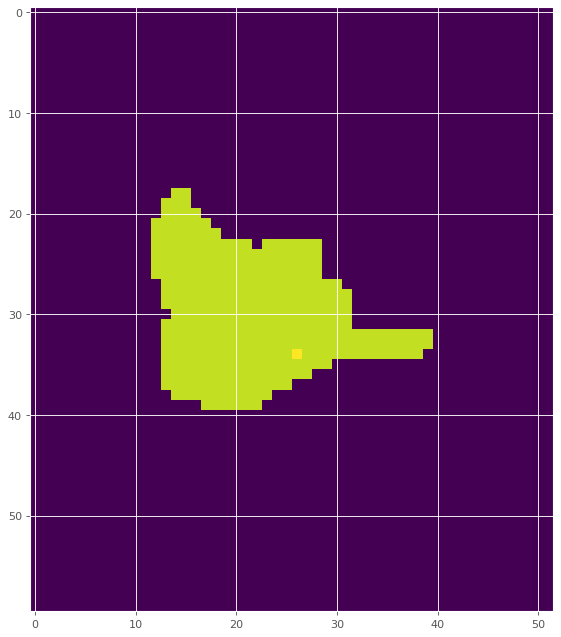

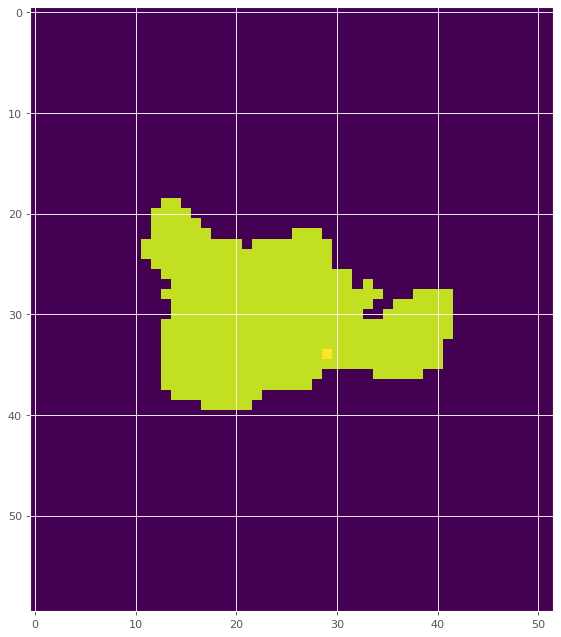

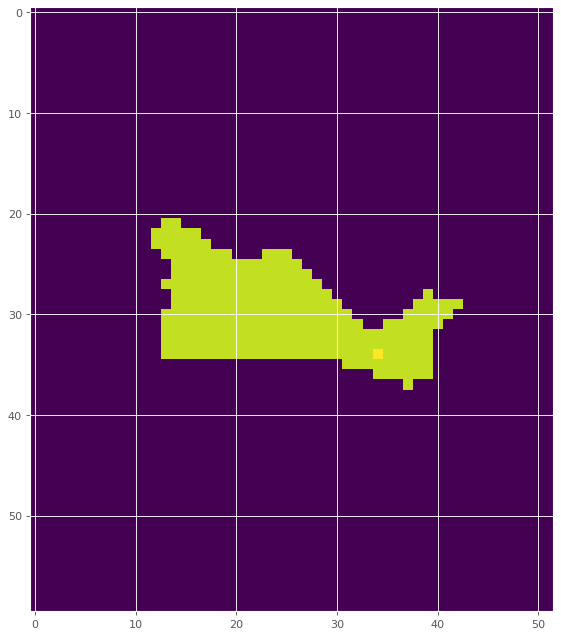

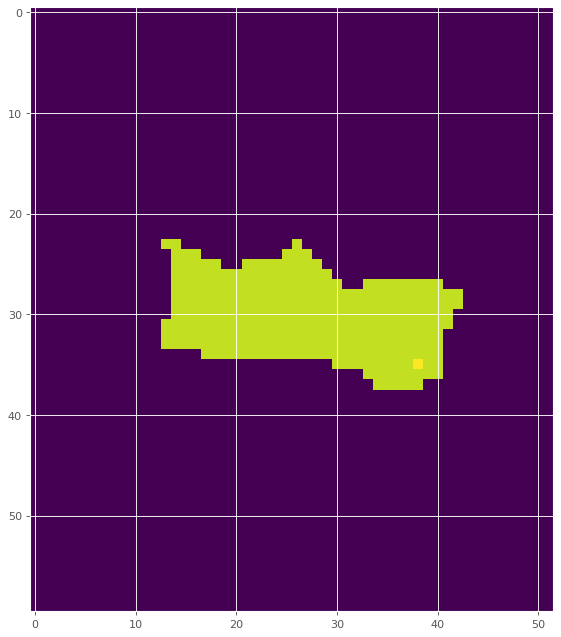

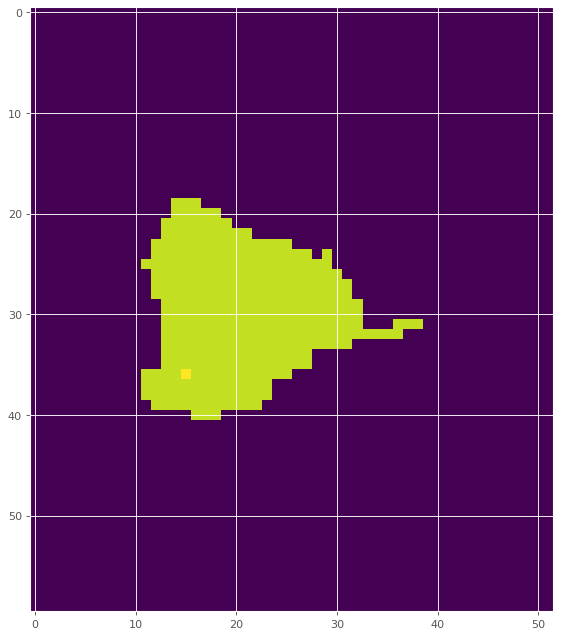

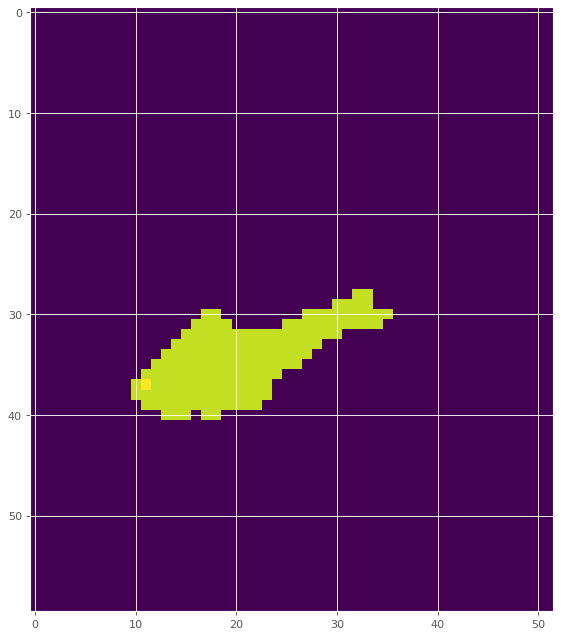

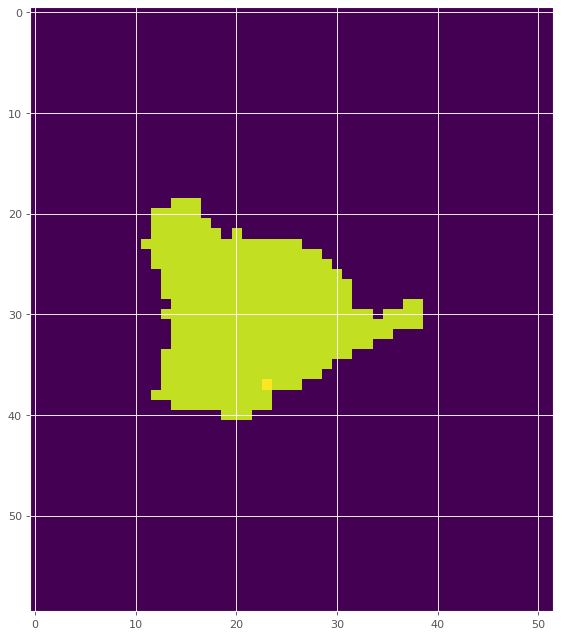

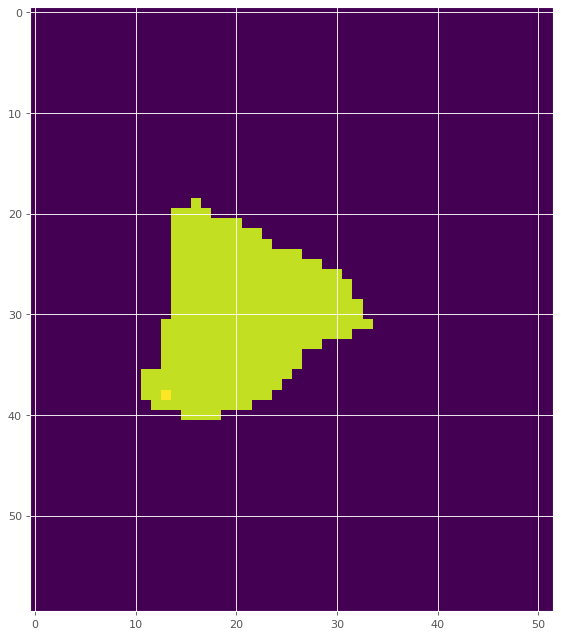

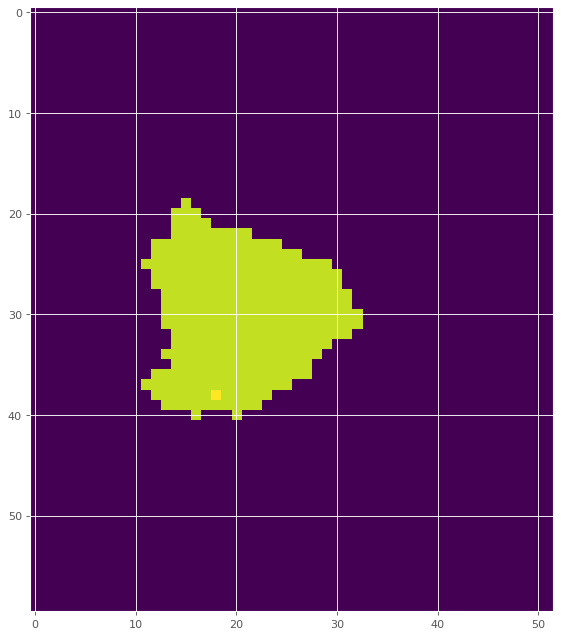

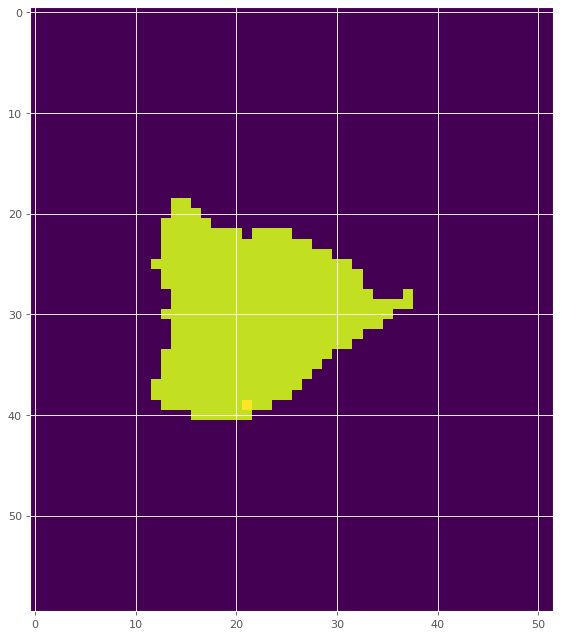

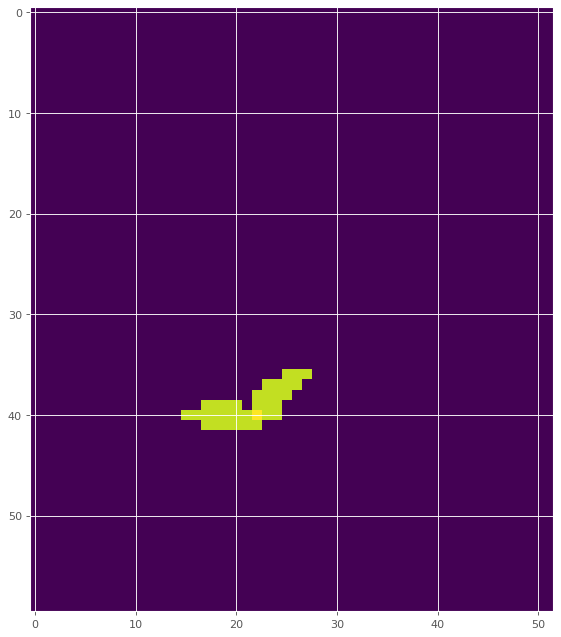

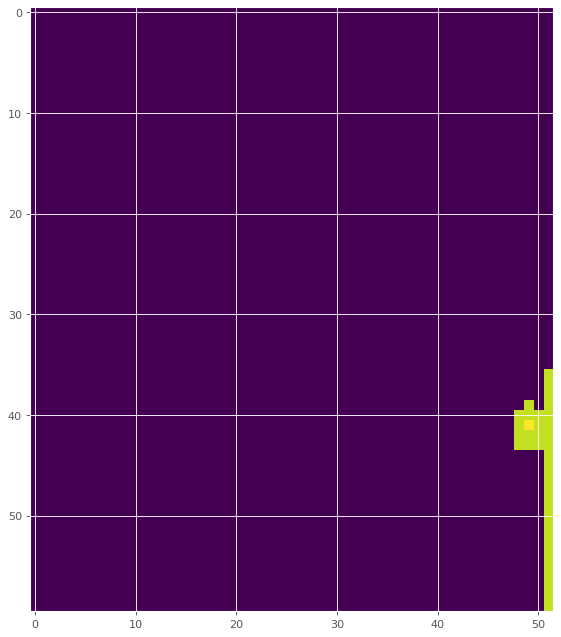

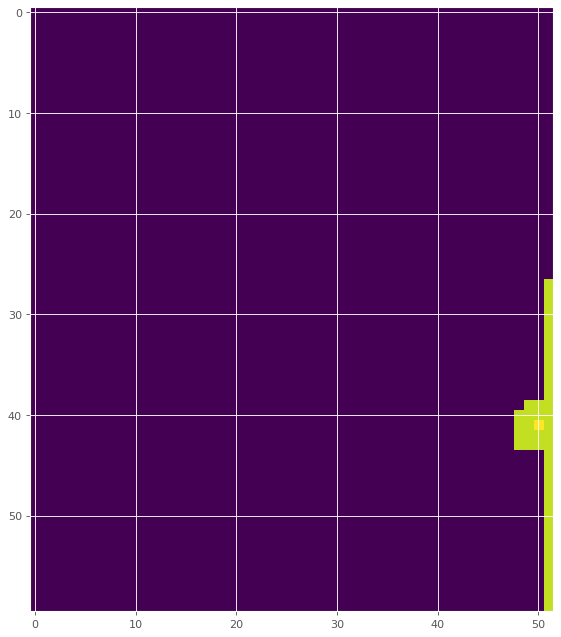

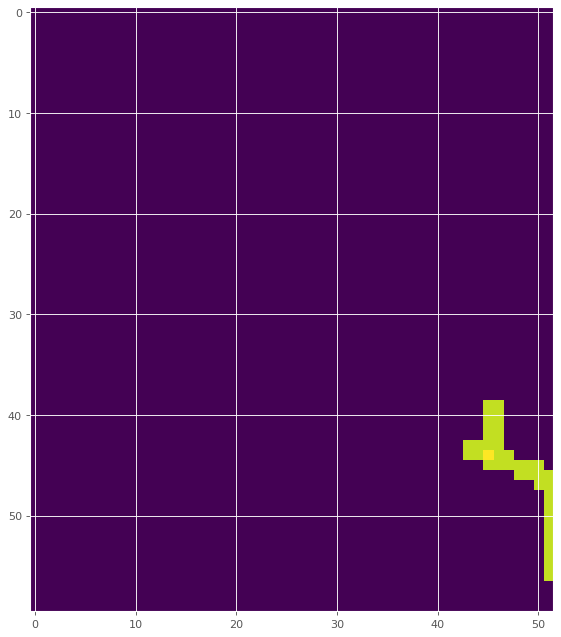

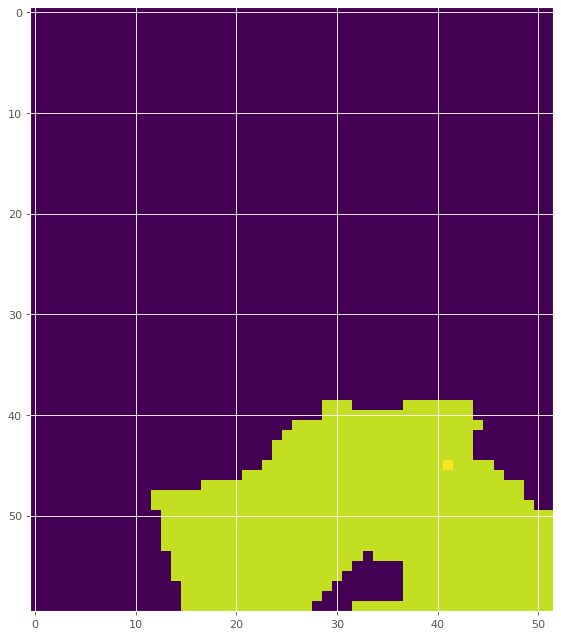

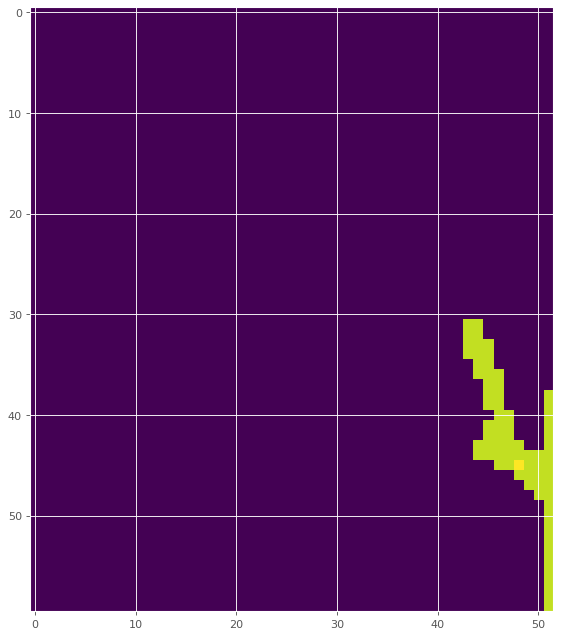

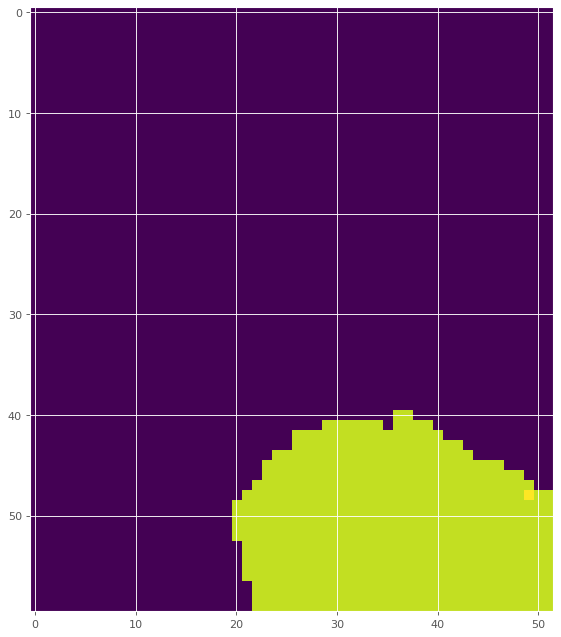

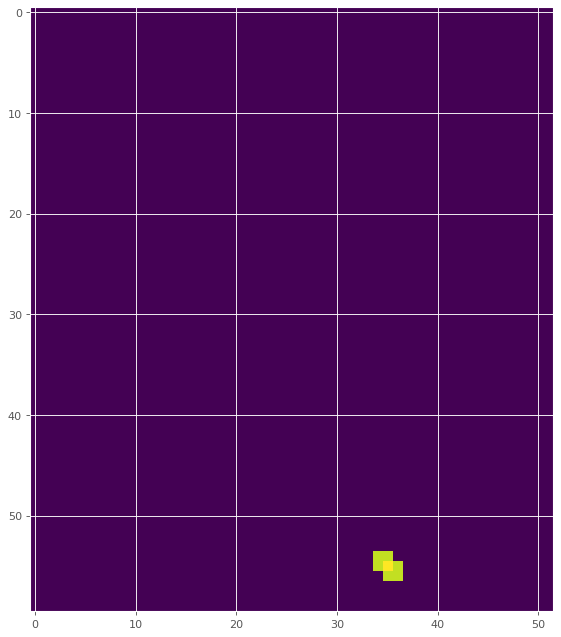

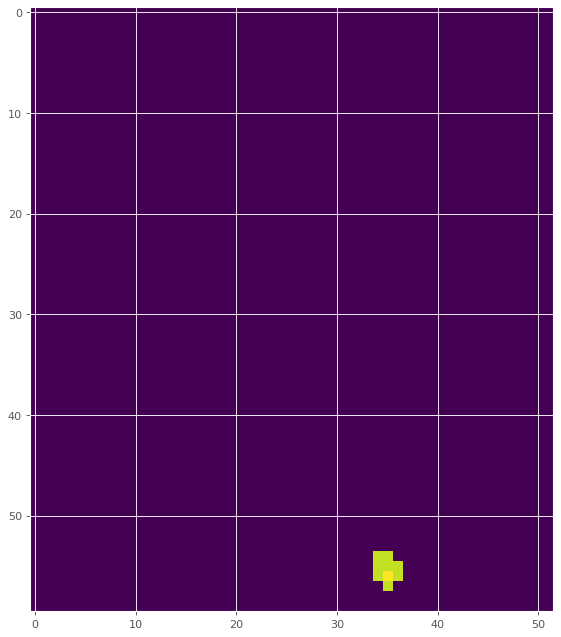

In [378]:

for i in range(len(varmask)):
    figure(figsize=(10, 10), dpi=80)
    plt.imshow(10*(varmask[i]>0)+(locations[i]))
    plt.show()

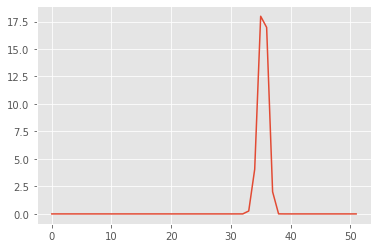

In [382]:
plt.plot(nonsat[56][:])

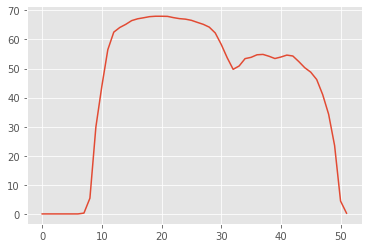

In [280]:
plt.plot(nonsat[28][:])

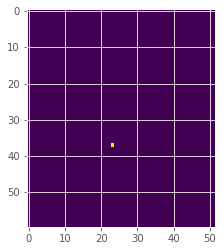

In [339]:
plt.imshow(locations)